In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

import keras
from keras import layers, models, optimizers

from scipy import integrate
from scipy import interpolate
from scipy.stats import norm

import time



def calcul_energie (abscisse,fonction):
  hbar = 1
  omega = 1
  m = 1
  a = -5.
  b = 5.

  #Calcul des interpolations
  tck_true = interpolate.splrep(abscisse, fonction, k=3, s=0)                        #F.O. fonction d'onde
  tck_true_carre = interpolate.splrep(abscisse, fonction*fonction, k=3, s=0)             #F.O. module carré
  tck_true_x = interpolate.splrep(abscisse, abscisse*abscisse*fonction*fonction, k=3, s=0)       #F.O. <x^2>
  der_true = interpolate.splev(abscisse, tck_true, der=1)                   #F.O. dérivée
  tck_true_der = interpolate.splrep(abscisse,der_true*der_true, k=3,s=0)         #F.O. dérivée spline 100
  int_true_carre = interpolate.splint(a,b,tck_true_carre)               #F.O. module carré
  int_true_x = interpolate.splint(a,b,tck_true_x)                       #F.O. <x^2>
  int_true_der = interpolate.splint(a,b,tck_true_der)                   #F.O. derivée carré
  #Calcul de l'énergie
  Energie = ((-pow(hbar,2)/(2*m))*(fonction[-1]*der_true[-1]-fonction[0]*der_true[0] 
                             - int_true_der) + 0.5*m*omega*int_true_x ) / int_true_carre
  return Energie


def normalisation (abscisse,fonction):
  tck_true_carre = interpolate.splrep(abscisse, fonction*fonction, s=0)             #F.O. module carré
  int_true_carre = interpolate.splint(a,b,tck_true_carre)                           #F.O. module carré
  fonction = fonction*pow(1/int_true_carre,1/2)

  return fonction





hbar = 1
omega = 1
m = 1
pts = 100
a = -5.
b = 5.
x = a
h = 10/pts
linx = np.linspace (a,b,pts)





#vraie fonction d'onde
vraie_onde = np.zeros_like(linx, dtype=float)
for i in range(0,pts):
  vraie_onde[i] = pow(m*omega/(math.pi*hbar),0.25)*math.exp(-m*omega*(pow(x,2))/(2*hbar))
  x+=h
#symétrisation
for j in range(0,pts):
    vraie_onde[j] = (vraie_onde[j]+vraie_onde[pts-1-j])/2
    vraie_onde[pts-1-j] = vraie_onde[j]
#normalisation
vraie_onde = normalisation(linx,vraie_onde)
#calcul de son énergie
energie_cible = calcul_energie(linx,vraie_onde)








#fonction d'onde constante
onde = np.ones_like(linx)
#normalisation
onde = normalisation (linx,onde)
#calcul de son énergie
energie_onde = calcul_energie(linx,onde)
#copie
premier_target = onde



temps = time.clock()


#INITIALISATION DU MODEL
fits = 2000 #nombre de fits

model = models.Sequential([
  layers.Dense(200, input_shape=(1,), activation='relu'),
  layers.Dense(200, input_shape=(1,), activation='relu'),
  layers.Dense(200, input_shape=(1,), activation='relu'),
  layers.Dense(1), # no activation -> linear function of the input
])
#model.summary()
opt = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=opt)




for i in range(0,fits):

  #fit de l'onde
  model.fit(linx,onde,epochs=1,batch_size=50,verbose=0)
  predictions = model.predict(linx)

  #symétrisation et valeur absolue de la prédiction + normalisation
  preds = np.abs(predictions.reshape(-1))
  for j in range(0,pts):
    preds[j] = (preds[j]+preds[pts-1-j])/2
    preds[pts-1-j] = preds[j]
  preds = normalisation(linx,preds)

  energie_preds = calcul_energie(linx,preds)

  #sélection de l'onde avec l'énergie la plus faible
  if (energie_preds < energie_onde):
    onde = preds
    energie_onde = energie_preds
    print('fit n°',i+1)
    print('Energie onde = ',energie_preds)



keras.backend.clear_session()

temps2 = time.clock()
print('Temps de calcul = ',temps2-temps)
print('Energie de référence = ',energie_cible)
print('Energie trouvée = ',energie_onde)
print('Energie 1er target = ',calcul_energie(linx,premier_target))




# Ecriture des fonctions d'onde
file1 = open("premier_target.txt", "w")
file2 = open("fct_theorique.txt", "w")
file3 = open("prediction.txt", "w")
file4 = open("abscisses.txt", "w")

np.savetxt(file1, premier_target, fmt='%.18e', delimiter='', newline='\n')
np.savetxt(file2, vraie_onde, fmt='%.18e', delimiter='', newline='\n')
np.savetxt(file3, onde, fmt='%.18e', delimiter='', newline='\n')
np.savetxt(file4, linx, fmt='%.18e', delimiter='', newline='\n')

file1.close()
file2.close()
file3.close()
file4.close()

Using TensorFlow backend.


fit n° 16
Energie onde =  3.9015874440829883
fit n° 17
Energie onde =  3.7122208863514006
fit n° 18
Energie onde =  3.677658055774597
fit n° 19
Energie onde =  3.5311703694678553
fit n° 20
Energie onde =  3.421630483481135
fit n° 21
Energie onde =  3.3426752294156357
fit n° 22
Energie onde =  3.3302279623711257
fit n° 23
Energie onde =  3.316275754822528
fit n° 24
Energie onde =  3.2493029650232126
fit n° 25
Energie onde =  3.234876818311581
fit n° 27
Energie onde =  3.209267509415611
fit n° 28
Energie onde =  3.1903849944536655
fit n° 30
Energie onde =  3.180898135270433
fit n° 31
Energie onde =  3.1732017210500083
fit n° 33
Energie onde =  3.158191427371107
fit n° 34
Energie onde =  3.1575374949553034
fit n° 36
Energie onde =  3.14707368606539
fit n° 37
Energie onde =  3.145884317075071
fit n° 39
Energie onde =  3.1350433788938217
fit n° 42
Energie onde =  3.1307086384344527
fit n° 44
Energie onde =  3.127077340216017
fit n° 45
Energie onde =  3.1260912931640794
fit n° 46
Energie ond

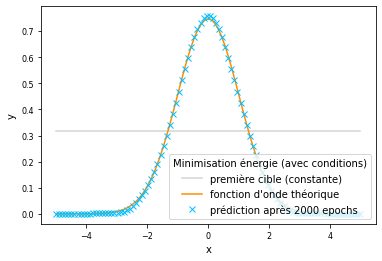

In [6]:
"""
import numpy as np
import matplotlib.pyplot as plt

premier_target = np.loadtxt("premier_target.txt", dtype=float, delimiter=' ')
vraie_onde = np.loadtxt("fct_theorique.txt", dtype=float, delimiter=' ')
onde = np.loadtxt("prediction.txt", dtype=float, delimiter=' ')
linx = np.loadtxt("abscisses.txt", dtype=float, delimiter=' ')
"""
plt.xlabel('x')
plt.ylabel('y')
#plt.yscale('log')
plt.plot(linx,premier_target,c='darkgrey',label = "première cible (constante)",alpha = 0.5)
plt.plot(linx,vraie_onde,c='darkorange',label = "fonction d'onde théorique")
plt.plot(linx,onde,c='deepskyblue',marker = 'x',label = 'prédiction après 2000 epochs',linestyle='None')
plt.legend(title = "Minimisation énergie (avec conditions)" ,loc = 'lower right', prop={'size': 10})
plt.tick_params(axis='both',labelsize=8)
plt.savefig('minimisation_avec_conditions.pdf')